In [154]:
import numpy as np
import os
from PIL import Image

import decord
from decord import VideoReader
from decord import cpu, gpu

import matplotlib.pyplot as plt

import pdfplumber

import torch
import lpips

from skimage.metrics import structural_similarity as ssim

import json

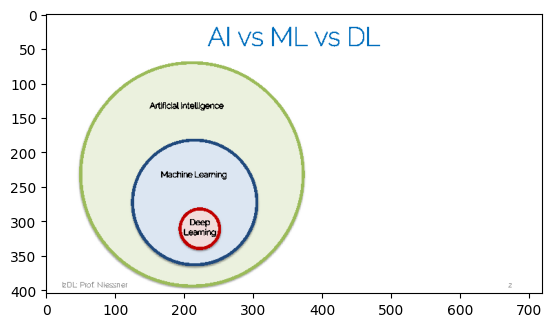

(90, 405, 720, 3)


In [60]:
# Load Slides to numpy

lecture = pdfplumber.open("2.Linear.pdf")

slides = []
for page in lecture.pages:
    slides.append(np.array(page.to_image().original))
    
slides = np.array(slides)

plt.imshow(slides[1])
plt.show()
print(slides.shape)

In [3]:
# Load Video and convert to frames

stream = VideoReader('2.Linear.mp4', ctx=cpu(0))

In [61]:
video_frames = []
fps = 30
for i in range(0, len(stream), 2*fps):
    video_image = Image.fromarray(stream[i].asnumpy()[33:685, ...])
    video_image = np.array(video_image.resize((720,405)))[:,:580]
    video_frames.append(video_image)

[h264 @ 0x8ac4680] mmco: unref short failure
[h264 @ 0x8ac4680] mmco: unref short failure
[h264 @ 0x8ac4680] mmco: unref short failure
[h264 @ 0x8ac4680] mmco: unref short failure
[h264 @ 0x8ac4680] mmco: unref short failure
[h264 @ 0x8ac4680] mmco: unref short failure
[h264 @ 0x8ac4680] mmco: unref short failure
[h264 @ 0x8ac4680] mmco: unref short failure


In [62]:
video_frames = np.array(video_frames) #/ 255
print(video_frames.shape)

(3112, 405, 580, 3)


In [141]:
%%time
matching = {}
for i, f in enumerate(key_frames):
    scores = []
    for k, s in enumerate(slides):
        scrop = s[:,:580]
        
        #l2 = np.mean((f - scrop)**2)
        score = ssim(scrop, f, channel_axis=2, data_range=255)
        scores.append(score)
    scores = np.array(scores)
    matching[i] = np.argmax(scores)
    print(np.argmax(scores))

0
1
2
54
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
8
7
7
7
8
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
12
12
13
14
15
16
23
18
19
18
19
18
20
21
22
22
23
25
26
26
27
30
29
30
31
33
34
33
34
33
35
36
35
33
35
37
32
38
39
38
39
40
42
43
44
47
52
53
52
53
55
58
60
66
67
66
67
68
69
70
70
71
72
74
76
77
78
76
81
83
84
85
86
87
88
CPU times: user 5min 23s, sys: 25.9 ms, total: 5min 23s
Wall time: 5min 23s


In [156]:
print(matching)
print(indices)

time = 0

timestamps = {}
for key, value in matching.items(): 
    timestamps[str(value)] = time + indices[key]*2
    

{0: 0, 1: 1, 2: 2, 3: 54, 4: 3, 5: 3, 6: 4, 7: 4, 8: 4, 9: 4, 10: 4, 11: 4, 12: 4, 13: 4, 14: 4, 15: 4, 16: 4, 17: 4, 18: 4, 19: 4, 20: 4, 21: 4, 22: 4, 23: 5, 24: 6, 25: 7, 26: 7, 27: 7, 28: 7, 29: 7, 30: 7, 31: 7, 32: 7, 33: 7, 34: 7, 35: 7, 36: 7, 37: 7, 38: 7, 39: 7, 40: 7, 41: 7, 42: 7, 43: 7, 44: 7, 45: 7, 46: 7, 47: 8, 48: 7, 49: 7, 50: 7, 51: 8, 52: 9, 53: 10, 54: 10, 55: 10, 56: 10, 57: 10, 58: 10, 59: 10, 60: 10, 61: 10, 62: 10, 63: 10, 64: 10, 65: 10, 66: 10, 67: 10, 68: 10, 69: 11, 70: 11, 71: 11, 72: 11, 73: 11, 74: 11, 75: 11, 76: 11, 77: 11, 78: 11, 79: 11, 80: 11, 81: 11, 82: 11, 83: 11, 84: 12, 85: 12, 86: 13, 87: 14, 88: 15, 89: 16, 90: 23, 91: 18, 92: 19, 93: 18, 94: 19, 95: 18, 96: 20, 97: 21, 98: 22, 99: 22, 100: 23, 101: 25, 102: 26, 103: 26, 104: 27, 105: 30, 106: 29, 107: 30, 108: 31, 109: 33, 110: 34, 111: 33, 112: 34, 113: 33, 114: 35, 115: 36, 116: 35, 117: 33, 118: 35, 119: 37, 120: 32, 121: 38, 122: 39, 123: 38, 124: 39, 125: 40, 126: 42, 127: 43, 128: 44, 

In [158]:
json_object = json.dumps(timestamps, indent=4)
out_file = "timestamps.json"
with open(out_file, "w") as outfile:
    outfile.write(json_object)

In [124]:
indices = []
prev_l2 = 0
for i in range(len(video_frames)-1):
    l2 = np.mean((video_frames[i] - video_frames[i+1])**2)
    
    if l2 > 8:
        indices.append(i)
        
print(len(indices))
    

159


In [125]:
key_frames = video_frames[indices]

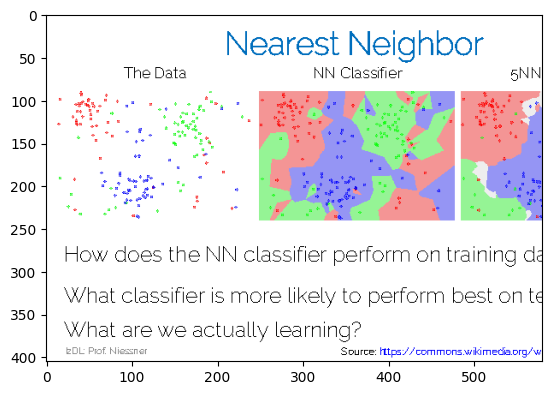

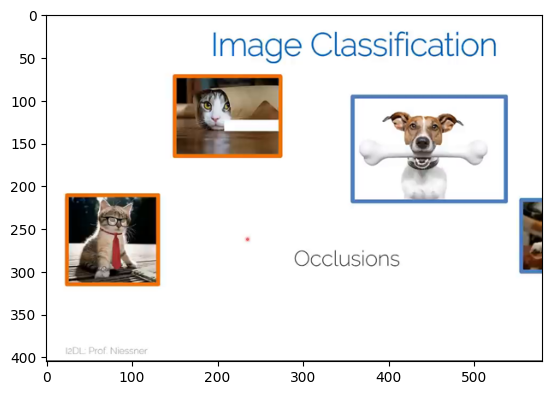

In [149]:
plt.imshow(slides[13, :, :580])
plt.show()
plt.imshow(key_frames[23])
plt.show()

In [49]:
for j, s in enumerate(slides): 
    
    for i, k in enumerate(key_frames):
        scrop = s[:,:580]
        
        l2 = np.mean((scrop-k)**2)
        score = ssim(scrop, k, channel_axis=2, data_range=1.0)
        #print(score)
        if score > 0.9:
            print(j, i)
        

0 0
1 1
5 17
6 18
8 39
8 43
9 44
15 57
23 68
30 73
31 74
32 44
33 77
33 81
35 78
35 80
35 82
37 83
39 86
39 88
40 89
42 90
43 91


KeyboardInterrupt: 

In [7]:
def l2_loss(frame, slide):
    
    l2 = np.mean((frame-slide)**2)
    
    return l2

In [8]:
def match_frame2slide(frames, slide):
    
    matches = []
    for i, f in enumerate(frames):
        print(f.shape, slide.shape)
        sim = ssim(f, slide, channel_axis=3, data_range=1.0)
        print(sim)
            
    return

In [9]:
def find_matching_frames(video_frames, query_image, threshold=0.95):
    """
    Find indices of video frames that match the query image using SSIM.
    
    Parameters:
    video_frames: numpy.ndarray
        Array of video frames with shape (n_frames, height, width, channels)
    query_image: numpy.ndarray
        Query image with shape (height, width, channels)
    threshold: float
        SSIM threshold (0 to 1) for considering frames as matches
        
    Returns:
    list: Indices of matching frames
    """
    
    # Ensure consistent dimensions
    #if query_image.shape != video_frames[0].shape:
    #    query_image = cv2.resize(query_image, (video_frames[0].shape[1], video_frames[0].shape[0]))
    
    # Ensure images are in the correct format for SSIM
    if query_image.dtype != np.float32:
        query_image = query_image.astype(np.float32) / 255.0
    
    matching_indices = []
    
    # Compare each frame with query image
    for i, frame in enumerate(video_frames):
        # Convert frame to float32 and normalize
        if frame.dtype != np.float32:
            frame = frame.astype(np.float32) / 255.0
        
        # Calculate SSIM for multichannel image
        score = ssim(query_image, frame, channel_axis=2, data_range=1.0)
        
        if score >= threshold:
            matching_indices.append(i)
    
    return matching_indices

In [33]:
def matching_ssim(video_frames, slide, threshold=0.9):
    
    indices = []
    for i, f in enumerate(video_frames):
        score = ssim(slide, f, channel_axis=2, data_range=1.0)
        
        if score >= threshold:
            indices.append(i)
            
    return indices

def matching_lpips(stream, slide, metric, threshold=0.1):
    
    indices = []
    for i in range(0, len(stream), 2*30):
        video_image = Image.fromarray(stream[i].asnumpy()[33:685,...])
        video_image = np.array(video_image.resize((720,405)))[:,:580]
        ftorch = torch.from_numpy(video_image.transpose(2,0,1).astype(np.float32))
        score = metric(slide, ftorch)
        print(score)
        break
        
        if score >= threshold:
            indices.append(i)
            
    return indices

In [34]:
torch.cuda.is_available()

True

In [ ]:
lpips_a = lpips.LPIPS(net='alex')
for j, s in enumerate(slides): 
    storch = torch.from_numpy(s[:,:580].transpose(2,0,1).astype(np.float32))
    print(storch.dtype)
    match = matching_lpips(stream, storch, lpips_a, threshold=0.1)
    print(match)
    
    if j > 2:
        break

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
